# Import Libraries

In [1]:
#Import Libraries
import numpy as np
from random import sample
import pandas as pd
import matplotlib.pyplot as plt
from collections import deque
import math

# Import the Reward and Transition Matrix from the xls file

In [2]:
#Import the reward table and the transition matrix
r_table = pd.read_excel('environment_matrices.xlsx', sheet_name ='rewards', index_col=0)
state_value_function = pd.read_excel('environment_matrices.xlsx', sheet_name ='State value function')
transition_matrix = pd.read_excel('environment_matrices.xlsx', sheet_name ='transition',index_col=0)
transition_matrix = pd.read_excel('environment_matrices.xlsx', sheet_name ='transition',index_col=0)

# Initialize important parameters and Q matrix

In [3]:
#Initialize parameters
total_episodes = 10000 #Total episodes
number_of_steps = 100 #Maximum steps per episode
epsilon = 1 #Highest exploration probability
epsilon_min = 0.1 # Lowest exploration probability 
decay_rate = 0.996 #Exponential decay rate for exploration probability

#Q Learning parameters
alpha = 0.15 #Learning rate
gamma = 0.999 #Discount rate

#Initialization of the Q matrix
q_table = pd.DataFrame(np.matrix(np.zeros([16,4])).astype("float32"), columns = transition_matrix.columns, index = transition_matrix.index)
q_table.head()

,UP,DOWN,RIGHT,LEFT
A,0.0,0.0,0.0,0.0
B,0.0,0.0,0.0,0.0
C,0.0,0.0,0.0,0.0
D,0.0,0.0,0.0,0.0
E,0.0,0.0,0.0,0.0


In [4]:

# Define the optimal state value table
optimal_state_value_function = np.array(state_value_function)
optimal_state_value_function

array([[-6, -5, -4, -5],
       [-5,  0, -3,  0],
       [-4, -3, -2,  0],
       [ 0, -2, -1,  0]], dtype=int64)

# Epsilon-Greedy-Decay Policy

In [5]:
# ε-greedy_decay policy function

def e_greedy_decay_policy(state, epsilon):
    exploration_threshold = np.random.uniform(0,1)
    actions_list = ["UP", "DOWN", "RIGHT", "LEFT"]
    #With probability 1-ε choose the action with the highest q-value
    #e-decay policy implementation
    if (exploration_threshold >= epsilon):
        # Exploit: Then we choose the best action from the Q table
        action = q_table.loc[state, :].argmax()
        #print('Max Q row value', action)  
    else:
        # Explore: We take a random action from the action list
        action = sample(actions_list, 1)[0]
    return action

# 'execute_action' Function

In [6]:
# Execution of the action selected from policy.
def execute_action(state, action):
    next_state = transition_matrix.loc[state,action] #return the next state
    reward = r_table.loc[state, next_state]
    end_episode_states = ['F', 'H', 'L', 'M', 'P']
    done = False #done is a flag to determine if my algorithm is going to terminate or not
    if (next_state in end_episode_states):
        done = True
    print('Current state', state)
    print('Next state', next_state)
    print ('Done', done)
    
    
    return next_state, reward, done

# 'update_Q' Function

In [7]:

#Update Q

def update_Q(current_state, next_state, action, reward, alpha, gamma):
    q_old = q_table.loc[current_state, action] #OLD Q value
    q_new = q_old + alpha * (reward + gamma * max(q_table.loc[next_state,:] - q_old))
    #q_new_values.append(q_new) # # add the new q value to a list with all the q new values
    q_table.loc[current_state, action] = q_new
    
    print('Old Q value:       ', q_old)
    print('Updated Q value (Q new): ', q_new)

# Train the agent

In [8]:
#Training the agent
sum_reward = 0
episodes_rewards_list_per_10 = []


#Main
episodes_rewards_list = []
window = 100
# initialize average rewards
average_reward = deque(maxlen=total_episodes)
# initialize best average reward as negative infinity
best_average_reward = -math.inf
# initialize monitor for most recent rewards
check_rewards = deque(maxlen=window)

#EPISODES
for episode in range(1, total_episodes + 1):
    current_state = 'A'
    episode_reward = 0
    # Decide the value of epsilon before the start of the episode
    for step in range (number_of_steps):
        #Choose action depending on the value of epsilon
        action = e_greedy_decay_policy(current_state, epsilon)
        
        #Execute Action and calculate the next state, the reward and check if the episode is finished
        next_state, reward, done = execute_action(current_state, action)
        
        # Update the Q Matrix based on the new values
        update_Q(current_state, next_state, action, reward, alpha, gamma)
        current_state = next_state
        
        episode_reward += reward 
        
        if done:
            check_rewards.append(episode_reward)
            break

    if episode >= 100:
        average_reward = np.mean(check_rewards)
        if average_reward > best_average_reward:
            best_average_reward = average_reward
    print("\rEpisode {}/{} || Best average reward {}".format(episode, total_episodes, best_average_reward), end="")

    if best_average_reward > 83:
        print('\nThe environment is solved in {} episodes.'.format(episode-1), end = "")
        break
    
    #Reassure that the minimum epsilon value is going to be 0.1 and update the value of epsilon
    epsilon = max(epsilon_min, epsilon*decay_rate)
    episodes_rewards_list.append(episode_reward)
    print("\rEpsilon for this episode is: {}".format(epsilon))
    print("\rThe reward for this episode is: {}".format(episode_reward))
    
    episode_reward = 0

Current state A
Next state B
Done False
Old Q value:        0.0
Updated Q value (Q new):  -0.15
Current state B
Next state A
Done False
Old Q value:        0.0
Updated Q value (Q new):  -0.15
Current state A
Next state A
Done False
Old Q value:        0.0
Updated Q value (Q new):  -0.15
Current state A
Next state B
Done False
Old Q value:        -0.15
Updated Q value (Q new):  -0.27752250506728887
Current state B
Next state B
Done False
Old Q value:        0.0
Updated Q value (Q new):  -0.15
Current state B
Next state C
Done False
Old Q value:        0.0
Updated Q value (Q new):  -0.15
Current state C
Next state G
Done False
Old Q value:        0.0
Updated Q value (Q new):  -0.15
Current state G
Next state H
Done True
Old Q value:        0.0
Updated Q value (Q new):  -15.0
Epsilon for this episode is: 0.996ward -inf
The reward for this episode is: -107.0
Current state A
Next state E
Done False
Old Q value:        0.0
Updated Q value (Q new):  -0.15
Current state E
Next state E
Done Fal

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  # Remove the CWD from sys.path while we load stuff.


A
Next state B
Done False
Old Q value:        -0.82661617
Updated Q value (Q new):  -0.9243915117621422
Current state B
Next state F
Done True
Old Q value:        -15.0
Updated Q value (Q new):  -27.75225
Epsilon for this episode is: 0.9568695240087989
The reward for this episode is: -102.0
Current state A
Next state A
Done False
Old Q value:        -0.9733451
Updated Q value (Q new):  -1.0827115952670574
Current state A
Next state A
Done False
Old Q value:        -1.0827116
Updated Q value (Q new):  -1.1756895052939653
Current state A
Next state E
Done False
Old Q value:        -0.7021839
Updated Q value (Q new):  -0.7694391498684883
Current state E
Next state I
Done False
Old Q value:        -0.15
Updated Q value (Q new):  -0.27752250506728887
Current state I
Next state E
Done False
Old Q value:        0.0
Updated Q value (Q new):  -0.19158674727380276
Current state E
Next state F
Done True
Old Q value:        -47.810326
Updated Q value (Q new):  -55.645948328018186
Epsilon for this 

# Calculate Average Rewards per 100 Episodes

In [9]:
sum_rewards = 0
avg_rewards_per_100 = []

for i in range (1, len(episodes_rewards_list)+1):
    sum_rewards += episodes_rewards_list[i-1] 
    if (i%100) == 0 :
        avg_rewards_per_100.append(sum_rewards/100)
        sum_rewards=0
    if (i==len(episodes_rewards_list)):
        if (i%100==0):
            break
        else:
            avg_rewards_per_100.append(sum_rewards/(i%100))
        
avg_rewards_per_100

[-92.27,
 -28.94,
 -17.33,
 32.62,
 64.54,
 68.78,
 72.73,
 76.81,
 66.69,
 71.02,
 68.72,
 80.62,
 65.0,
 74.67,
 82.68,
 76.82,
 80.77777777777777]

In [10]:

df = pd.DataFrame()
df = df.fillna(0)
df['Avg_Reward'] = avg_rewards_per_100
df['Episodes'] = (df.index+1)*100
df

,Avg_Reward,Episodes
0,-92.270000,100
1,-28.940000,200
2,-17.330000,300
3,32.620000,400
4,64.540000,500
5,68.780000,600
6,72.730000,700
7,76.810000,800
8,66.690000,900
9,71.020000,1000


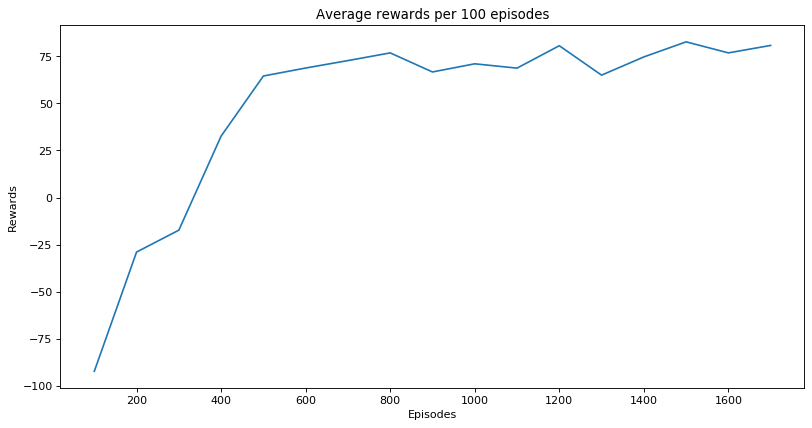

In [11]:
#Plot the average rewards per 100 episodes
plt.figure(figsize=(12,6), dpi=80)
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.title('Average rewards per 100 episodes')
plt.plot(df['Episodes'], df['Avg_Reward'])

# Calculate Average Rewards per 50 Episodes

In [12]:
sum_rewards = 0
avg_rewards_per_50 = []

for i in range (1, len(episodes_rewards_list)+1):
    sum_rewards += episodes_rewards_list[i-1] 
    if (i%50) == 0 :
        avg_rewards_per_50.append(sum_rewards/50)
        sum_rewards=0
    if (i==len(episodes_rewards_list)):
        if (i%50==0):
            break
        else:
            avg_rewards_per_50.append(sum_rewards/(i%50))
        
avg_rewards_per_50

len(avg_rewards_per_50)

34

In [13]:
df_50 = pd.DataFrame()
df_50 = df_50.fillna(0)
df_50['Avg_Reward'] = avg_rewards_per_50
df_50['Episodes'] = (df_50.index+1)*50
df_50

,Avg_Reward,Episodes
0,-97.920000,50
1,-86.620000,100
2,-58.220000,150
3,0.340000,200
4,-29.320000,250
5,-5.340000,300
6,30.500000,350
7,34.740000,400
8,54.820000,450
9,74.260000,500


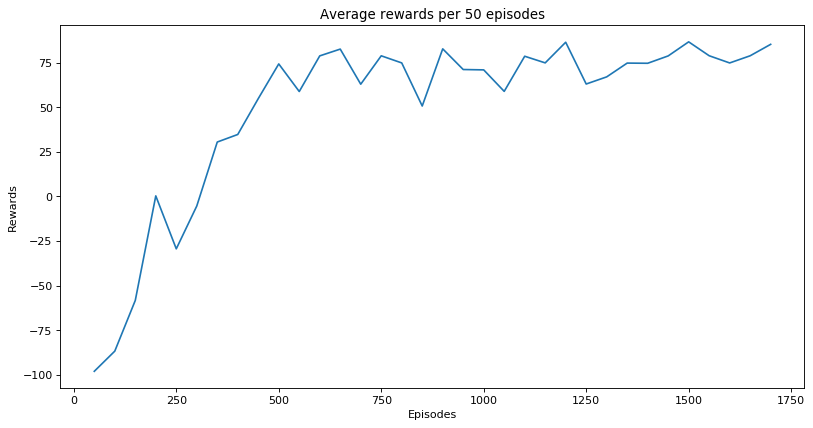

In [14]:

#Plot the average rewards per 50 episodes
plt.figure(figsize=(12,6), dpi=80)
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.title('Average rewards per 50 episodes')
plt.plot(df_50['Episodes'], df_50['Avg_Reward'])

# Calculate Average Rewards per 10 Episodes

In [15]:
sum_rewards = 0
avg_rewards_per_10 = []

for i in range (1, len(episodes_rewards_list)+1):
    sum_rewards += episodes_rewards_list[i-1] 
    if (i%10) == 0 :
        avg_rewards_per_10.append(sum_rewards/10)
        sum_rewards=0
    if (i==len(episodes_rewards_list)):
        if (i%10==0):
            break
        else:
            avg_rewards_per_10.append(sum_rewards/(i%10))
        
avg_rewards_per_10

len(avg_rewards_per_10)

168

In [16]:

df_10 = pd.DataFrame()
df_10 = df_10.fillna(0)
df_10['Avg_Reward'] = avg_rewards_per_10
df_10['Episodes'] = (df_10.index+1)*10

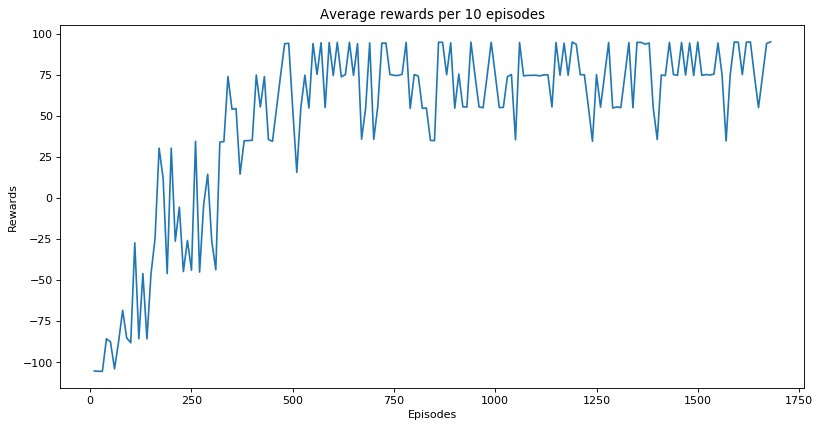

In [17]:

#Plot the average rewards per 10 episodes
plt.figure(figsize=(12,6), dpi=80)
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.title('Average rewards per 10 episodes')
plt.plot(df_10['Episodes'], df_10['Avg_Reward'])

# Calculate Reward per episode

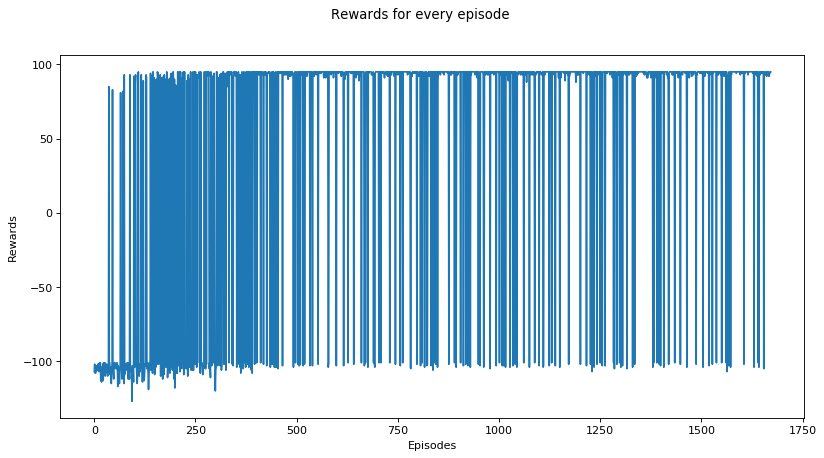

In [18]:
#%% Plot the reward for every episode
reward_per_episode = pd.DataFrame(np.asarray(episodes_rewards_list)) 
reward_per_episode['episodes'] = reward_per_episode.index
reward_per_episode.columns = ['total_reward', 'episodes']


plt.figure(figsize=(12, 6), dpi=80)
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.suptitle('Rewards for every episode')
plt.plot(reward_per_episode['episodes'], reward_per_episode['total_reward'])